In [1]:
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import csv
import pandas as pd
import time
from time import strptime
import cv2
from scipy.interpolate import interp1d

In [6]:
cd T:\freely_moving_ephys\ephys_recordings\092820\J524RT\whitenoise_hf1

T:\freely_moving_ephys\ephys_recordings\092820\J524RT\whitenoise_hf1


In [21]:
ls

 Volume in drive T is 8tb internal A
 Volume Serial Number is 7481-8BF5

 Directory of T:\freely_moving_ephys\ephys_recordings\092820\J524RT\whitenoise_hf1

10/05/2020  03:24 PM    <DIR>          .
10/05/2020  03:24 PM    <DIR>          ..
09/29/2020  02:38 PM    <DIR>          .phy
09/29/2020  02:25 PM       638,451,712 092820_J524RT_whitenoise_hf_Ephys_int16_med1_nch16.bin
09/29/2020  02:31 PM        23,209,644 092820_J524RT_whitenoise_hf_Ephys_int16_med1_nch16_ksSettings.mat
09/29/2020  02:25 PM        41,489,648 092820_J524RT_whitenoise_hf_Ephys_medianTrace.mat
10/05/2020  03:24 PM           139,786 092820_wn.csv
09/29/2020  02:30 PM           694,744 amplitudes.npy
09/29/2020  02:27 PM           647,782 CAR_fig1.fig
09/29/2020  02:28 PM            32,262 CAR_fig2.fig
09/29/2020  02:30 PM               144 channel_map.npy
09/29/2020  02:30 PM               336 channel_positions.npy
09/29/2020  02:38 PM               605 cluster_Amplitude.tsv
09/29/2020  02:38 PM               522 c

In [7]:
ephysTsFile = '..\092820_J524RT_whitenoise_hf_Ephys_BonsaiTS.csv' 
worldVidFile = '..\092820_J524RT_whitenoise_hf_WORLD.avi'
worldTsFile = '..\092820_J524RT_whitenoise_hf_WORLD_BonsaiTS.csv'

In [8]:
framerate = 30000
allSpikeT = np.load('spike_times.npy')
allSpikeT = allSpikeT/framerate  # should be a lookup table with timestamps
duration = np.max(allSpikeT)
duration

665.0385333333334

In [9]:
ephys_data = pd.read_csv('cluster_info.tsv',sep = '\t',index_col=0)
ephys_data


,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh
id,,,,,,,,,,
0,321.1,46.6,mua,21.315399,0,1.0,2.859919,good,1902,0
1,198.9,0.0,mua,17.515968,0,1.0,0.078189,noise,52,0
2,350.2,9.5,mua,25.664024,0,1.0,5.937865,good,3949,0
3,307.9,0.0,mua,23.266666,0,1.0,0.088715,noise,59,0
4,222.0,67.3,mua,15.303047,2,3.0,1.658512,noise,1103,0
5,285.8,0.0,mua,20.071659,8,9.0,0.084204,noise,56,0
6,204.2,780.0,mua,14.895452,5,6.0,0.081196,noise,54,0
7,971.7,0.0,good,32.694916,4,5.0,0.494697,good,329,0
8,399.1,0.0,mua,25.630907,11,12.0,0.175926,noise,117,0


In [10]:
clust = np.load('spike_clusters.npy')
clust

array([41, 16, 61, ..., 41, 12, 31])

In [11]:
ephys_data['spikeT'] = nan
ephys_data['spikeT'] = ephys_data['spikeT'].astype(object)
ephys_data.dtypes

Amplitude    float64
ContamPct    float64
KSLabel       object
amp          float64
ch             int64
depth        float64
fr           float64
group         object
n_spikes       int64
sh             int64
spikeT        object
dtype: object

In [12]:
# get spiketimes for each cluster
for c in np.unique(clust):
    c
    ephys_data.at[c,'spikeT'] =allSpikeT[clust==c].flatten()



In [13]:
# get waveform templates
templates = np.load('templates.npy')
templates.shape
ephys_data['waveform'] = nan
ephys_data['waveform'] = ephys_data['spikeT'].astype(object)
for i, ind in enumerate(ephys_data.index):
    ephys_data.at[ind,'waveform']= templates[ind,21:,ephys_data.at[ind,'ch']]

In [18]:
ephys_data.to_csv('092820_wn.csv')

In [19]:
data = pd.read_csv('092820_wn.csv')

In [20]:
data

,id,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,spikeT,waveform,rate
0,0,321.1,46.6,mua,21.315399,0,1.0,2.859919,good,1902,0,[6.14333333e-02 7.25000000e-02 9.82000000e-02 ...,[ 0.0106089 -0.00273786 -0.00299632 -0.004655...,NaN
1,1,198.9,0.0,mua,17.515968,0,1.0,0.078189,noise,52,0,[ 22.78786667 25.50243333 34.09103333 47.74...,[ 0.01296466 -0.00382767 -0.00077774 -0.003072...,NaN
2,2,350.2,9.5,mua,25.664024,0,1.0,5.937865,good,3949,0,[1.03466667e-01 2.48066667e-01 4.04400000e-01 ...,[ 0.00449249 -0.00338189 -0.00477735 -0.003748...,NaN
3,3,307.9,0.0,mua,23.266666,0,1.0,0.088715,noise,59,0,[ 7.1911 34.12173333 34.32756667 49.63...,[ 2.71653896e-03 1.44110969e-03 7.30023166e-...,NaN
4,4,222.0,67.3,mua,15.303047,2,3.0,1.658512,noise,1103,0,[4.26900000e-01 4.49200000e-01 1.29633333e+00 ...,[-2.0791870e-03 -3.8361396e-03 -1.8696458e-03 ...,NaN
5,5,285.8,0.0,mua,20.071659,8,9.0,0.084204,noise,56,0,[ 18.1561 24.98316667 33.96586667 37.89...,[ 0.00280144 0.00558378 0.00586395 0.006996...,NaN
6,6,204.2,780.0,mua,14.895452,5,6.0,0.081196,noise,54,0,[ 14.97613333 18.42083333 36.7141 55.07...,[-0.00457261 0.00496532 0.00359035 0.004724...,NaN
7,7,971.7,0.0,good,32.694916,4,5.0,0.494697,good,329,0,[7.30000000e-02 1.74766667e-01 2.07333333e-01 ...,[ 6.07159361e-03 1.08969053e-02 8.87793023e-...,NaN
8,8,399.1,0.0,mua,25.630907,11,12.0,0.175926,noise,117,0,[ 1.37946667 34.08253333 34.20886667 34.37...,[ 1.52423438e-02 1.00523541e-02 1.16024585e-...,NaN
9,9,199.0,64.0,mua,15.866518,4,5.0,0.380420,noise,253,0,[ 4.33966667 4.83653333 4.85783333 5.12...,[ 0.02323308 0.02671058 0.02671995 0.026284...,NaN


In [14]:
goodcells = ephys_data.loc[ephys_data['group']=='good']
goodcells


,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,spikeT,waveform
id,,,,,,,,,,,,
0,321.1,46.6,mua,21.315399,0,1.0,2.859919,good,1902,0,"[0.06143333333333333, 0.0725, 0.0982, 0.319466...","[0.010608896, -0.0027378588, -0.002996324, -0...."
2,350.2,9.5,mua,25.664024,0,1.0,5.937865,good,3949,0,"[0.10346666666666667, 0.24806666666666666, 0.4...","[0.0044924924, -0.0033818944, -0.004777348, -0..."
7,971.7,0.0,good,32.694916,4,5.0,0.494697,good,329,0,"[0.073, 0.17476666666666665, 0.207333333333333...","[0.0060715936, 0.010896905, 0.00887793, 0.0077..."
23,1250.0,0.0,good,64.190292,7,8.0,18.993950,good,12632,0,"[0.05623333333333334, 0.0608, 0.0822, 0.1031, ...","[0.00021674993, -0.0010089801, 0.00024007421, ..."
28,516.3,14.8,mua,41.329807,7,8.0,3.700452,good,2461,0,"[0.012433333333333333, 0.12983333333333333, 0....","[0.0050009307, 0.008511365, 0.008828017, 0.009..."
31,1824.4,15.8,mua,69.565178,8,9.0,22.130538,good,14718,0,"[0.0591, 0.1457, 0.20906666666666668, 0.3015, ...","[0.006277577, 0.01120119, 0.008944863, 0.00878..."
32,858.9,21.9,mua,58.978664,8,9.0,2.909539,good,1935,0,"[0.019266666666666668, 0.7055333333333333, 0.8...","[0.036005225, 0.0098562585, 0.017148694, 0.014..."
59,643.8,0.0,good,38.192627,11,12.0,0.766855,good,510,0,"[1.3816, 1.4074, 1.7556666666666667, 34.9598, ...","[0.025870776, 0.005830539, 0.010524722, 0.0080..."
61,707.0,0.0,good,40.266006,10,11.0,0.490186,good,326,0,"[0.009666666666666667, 9.154433333333333, 35.0...","[0.024087522, 0.004041113, 0.008603945, 0.0059..."


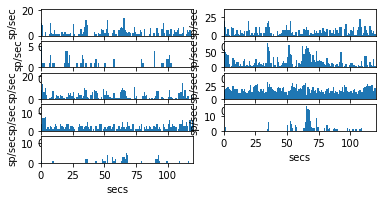

In [447]:
# plot spike firing rate
for i,ind in enumerate(goodcells.index):
   plt.subplot(7,2,i+1) 
   plt.hist(goodcells.at[ind,'spikeT'],bins = np.arange(0,np.max(allSpikeT),1))
   plt.xlim(0, 120); plt.xlabel('secs'); plt.ylabel('sp/sec')

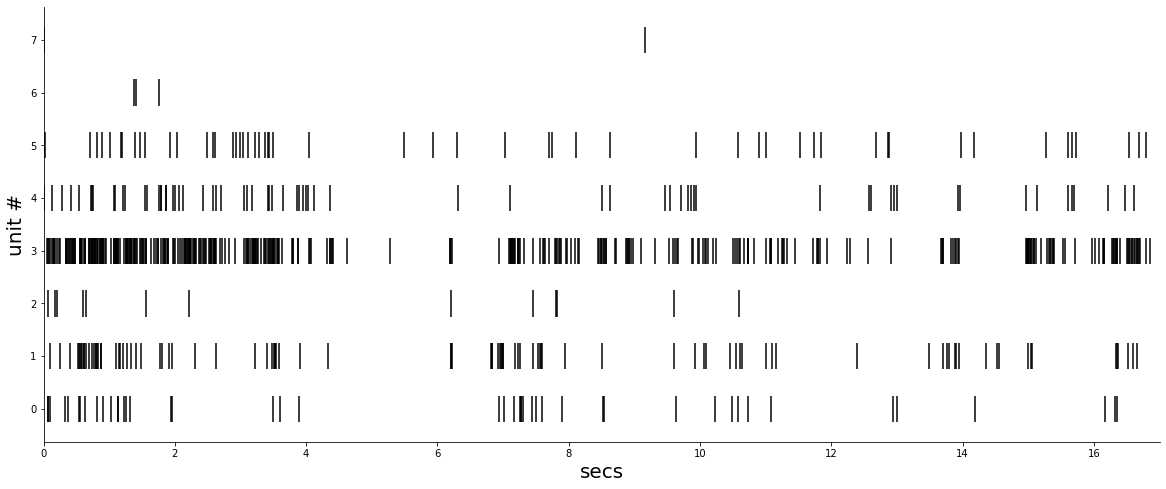

In [448]:
#spike rasters
fig, ax = plt.subplots(figsize=(20,8))
ax.fontsize = 20
for i,ind in enumerate(goodcells[goodcells['fr']<20].index):
   plt.vlines(goodcells.at[ind,'spikeT'],i-0.25, i+0.25)
   plt.xlim(0, 17); plt.xlabel('secs',fontsize = 20); plt.ylabel('unit #',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('spikeraster.pdf')

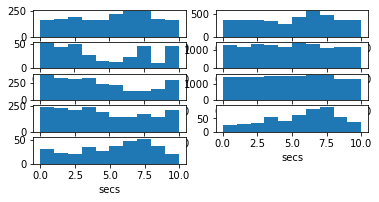

In [449]:
# cycle average firing rate
ncyc = duration/10
for i,ind in enumerate(goodcells.index):
   plt.subplot(7,2,i+1) 
   plt.hist(goodcells.at[ind,'spikeT']%10,bins = 10) # should be normalized by ncyc, so get data from hist and divide by ncyc before plotting
   plt.xlabel('secs')

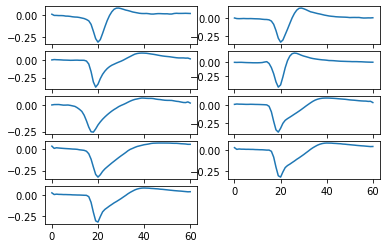

In [450]:
# plot waveforms
for i,ind in enumerate(goodcells.index):
   plt.subplot(5,2,i+1) 
   plt.plot(goodcells.at[ind,'waveform'])

In [239]:
i, ind in enumerate(goodcells[goodcells['fr']<20].index)

(10, False)

In [240]:
goodcells[goodcells['fr']<20]

,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,spikeT,waveform
id,,,,,,,,,,,,
0,383.9,8.9,good,31.474401,0,1.0,9.410262,good,11219,0,"[0.0052, 0.1723, 0.3153666666666667, 0.3792, 0...","[-0.0043589817, -0.005534245, -0.006801264, -0..."
2,427.5,6.7,good,33.772884,0,1.0,4.480758,good,5342,0,"[0.2502333333333333, 0.3950666666666667, 0.400...","[7.201318e-05, -0.014391127, -0.010996173, -0...."
5,900.6,7.7,good,37.470116,4,5.0,0.900010,good,1073,0,"[0.47253333333333336, 1.4617, 1.4748, 1.49, 1....","[0.0023106122, 0.005993641, 0.00474555, 0.0035..."
13,615.3,46.4,mua,39.998573,5,6.0,0.936916,good,1117,0,"[2.1380666666666666, 3.807533333333333, 4.0626...","[0.015905505, 0.01845782, 0.012999079, 0.01265..."
22,707.6,9.0,good,69.099602,7,8.0,7.791419,good,9289,0,"[0.1991, 0.28746666666666665, 0.32476666666666...","[0.013564532, 0.012236126, 0.010539431, 0.0141..."
31,946.6,6.7,good,73.780571,8,9.0,4.254287,good,5072,0,"[1.7500666666666667, 2.2780666666666667, 4.697...","[0.023237778, 0.025709478, 0.024878792, 0.0255..."
35,975.2,4.6,good,60.720009,8,9.0,13.105923,good,15625,0,"[0.039, 0.1157, 0.18506666666666666, 0.2453, 0...","[-0.0037945388, -0.0011765561, -0.003106528, -..."
36,681.5,8.7,good,50.105167,10,11.0,4.209832,good,5019,0,"[0.6080333333333333, 0.6903333333333334, 0.715...","[0.003321795, 0.006836787, 0.0069776815, 0.007..."
43,814.7,7.8,good,44.519928,11,12.0,3.212524,good,3830,0,"[1.2076333333333333, 1.3523666666666667, 1.394...","[0.017649947, 0.0035265898, 0.006606704, 0.003..."


In [15]:
# get ephys times - most important is first timestamp
read_time = pd.read_csv(ephysTsFile, encoding='utf-8', engine='c', header=None)
time_in = pd.to_timedelta(read_time.squeeze(), unit='us', errors='coerce')
ephys_t0 = time_in[0].total_seconds()
ephys_t0


ValueError: embedded null character

In [16]:
read_time = pd.read_csv(worldTsFile, encoding='utf-8', engine='c', header=None)
time_in = pd.to_timedelta(read_time.squeeze(), unit='us', errors='coerce')
world_t = []
for i,ind in enumerate(time_in):
    world_t.append(time_in[i].total_seconds())

ValueError: embedded null character

In [274]:
world_t

[41749.5846016,
 41749.5870976,
 41749.5884544,
 41749.614592,
 41749.653632,
 41749.686592,
 41749.721408,
 41749.7523328,
 41749.7839616,
 41749.8162304,
 41749.8569984,
 41749.8890624,
 41749.9184,
 41749.9519488,
 41749.9823488,
 41750.0163456,
 41750.0561664,
 41750.08768,
 41750.119232,
 41750.1517952,
 41750.1842816,
 41750.2247936,
 41750.2569856,
 41750.288896,
 41750.318208,
 41750.3517952,
 41750.3836928,
 41750.4246784,
 41750.4563584,
 41750.4864256,
 41750.5209344,
 41750.624768,
 41750.6561792,
 41750.6885504,
 41750.7200256,
 41750.750144,
 41750.7827328,
 41750.8257664,
 41750.8563712,
 41750.8889216,
 41750.9202688,
 41750.9520256,
 41750.9850624,
 41751.0561664,
 41751.088128,
 41751.1217152,
 41751.1523456,
 41751.1842176,
 41751.2240896,
 41751.2573952,
 41751.3852544,
 41751.424384,
 41751.45632,
 41751.4884352,
 41751.5202048,
 41751.5545728,
 41751.5922304,
 41751.6242688,
 41751.6562048,
 41751.6868352,
 41751.7215232,
 41751.7522304,
 41751.7922432,
 41751.824

In [454]:
world_t = np.array(world_t)

In [278]:
np.diff(world_t)
plt.plot(np.diff(world_t))
plt.ylabel('frame dt secs')
plt.xlabel('frame #')

array([0.002496 , 0.0013568, 0.0261376, ..., 0.0321536, 0.0312704,
       0.0325504])

In [344]:
# read in worldcam video
cap = cv2.VideoCapture(worldVidFile)
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

buf = np.empty((frameCount, round(frameHeight/4), round(frameWidth/4)), np.dtype('uint8'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, im = cap.read()
    buf[fc] = cv2.resize(np.mean(np.array(im),axis=2),(160,120))
    fc += 1


In [345]:
buf.shape

(17864, 120, 160)

In [515]:
# normalize movie (z-score at each pixel)
# non-normalized is brighter in center, and arbitrary range
img_norm = (buf-np.mean(buf,axis=0))/np.std(buf,axis=0)

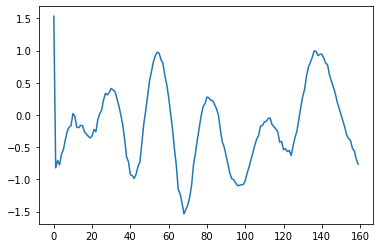

In [523]:
plt.plot(img_norm[0,50,:])
plt.xlabel('x - pixel')
plt.title('luminance across image')


In [524]:
contrast = np.empty(world_t.size)
for i in range(world_t.size):
    contrast[i] = np.std(img_norm[i,range(2,120,2),:])
img.shape

(17864, 480, 640)

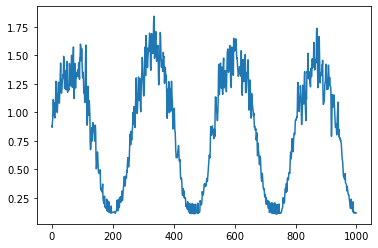

In [525]:
plt.plot(contrast[0:1000])
plt.xlabel('timebin')
plt.ylabel('contrast')

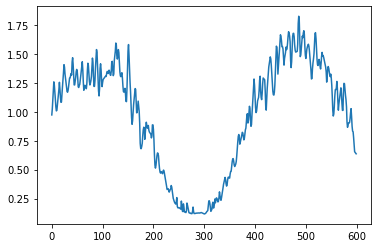

In [593]:
dt = 0.025
startT = max(world_t[0],ephys_t0)
endT = min(world_t[-1],ephys_t0 + max(allSpikeT))
t = np.arange(startT,endT,dt)
newc =interp1d(world_t,contrast)
contrast_interp = newc(t[0:-1])
contrast_interp.shape
plt.plot(contrast_interp[0:600])

In [17]:
ephys_data['rate'] = nan
ephys_data['rate'] = ephys_data['rate'].astype(object)
for i,ind in enumerate(ephys_data.index):
    ephys_data.at[ind,'rate'],bins = np.histogram(ephys_data.at[ind,'spikeT']+startT,t)
ephys_data['rate']= ephys_data['rate']/dt

NameError: name 'startT' is not defined

In [603]:
ephys_data

,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,spikeT,waveform,rate
id,,,,,,,,,,,,,
0,321.1,46.6,mua,21.315399,0,1.0,2.859919,good,1902,0,"[0.06143333333333333, 0.0725, 0.0982, 0.319466...","[0.010608896, -0.0027378588, -0.002996324, -0....","[0.0, 0.0, 80.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,198.9,0.0,mua,17.515968,0,1.0,0.078189,noise,52,0,"[22.787866666666666, 25.502433333333332, 34.09...","[0.012964657, -0.0038276657, -0.0007777399, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,350.2,9.5,mua,25.664024,0,1.0,5.937865,good,3949,0,"[0.10346666666666667, 0.24806666666666666, 0.4...","[0.0044924924, -0.0033818944, -0.004777348, -0...","[0.0, 0.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0,..."
3,307.9,0.0,mua,23.266666,0,1.0,0.088715,noise,59,0,"[7.1911, 34.12173333333333, 34.32756666666667,...","[0.002716539, 0.0014411097, 7.300232e-05, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,222.0,67.3,mua,15.303047,2,3.0,1.658512,noise,1103,0,"[0.4269, 0.4492, 1.2963333333333333, 1.3502333...","[-0.002079187, -0.0038361396, -0.0018696458, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,285.8,0.0,mua,20.071659,8,9.0,0.084204,noise,56,0,"[18.1561, 24.983166666666666, 33.9658666666666...","[0.0028014428, 0.0055837836, 0.005863954, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,204.2,780.0,mua,14.895452,5,6.0,0.081196,noise,54,0,"[14.976133333333333, 18.420833333333334, 36.71...","[-0.0045726104, 0.004965317, 0.0035903517, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,971.7,0.0,good,32.694916,4,5.0,0.494697,good,329,0,"[0.073, 0.17476666666666665, 0.207333333333333...","[0.0060715936, 0.010896905, 0.00887793, 0.0077...","[0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 40.0, 0.0, 40...."
8,399.1,0.0,mua,25.630907,11,12.0,0.175926,noise,117,0,"[1.3794666666666666, 34.08253333333333, 34.208...","[0.015242344, 0.010052354, 0.011602459, 0.0089...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [404]:

contrast_interp.shape

(6648,)

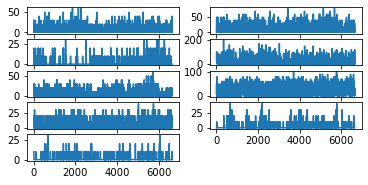

In [457]:
for i, ind in enumerate(goodcells.index):
    plt.subplot(7,2,i+1)
    plt.plot(goodcells.at[ind,'rate'])

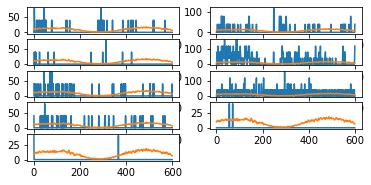

In [612]:
for i, ind in enumerate(goodcells.index):
    plt.subplot(7,2,i+1)
    plt.plot(goodcells.at[ind,'rate'][0:600])
    plt.plot(contrast_interp[0:600]*10)

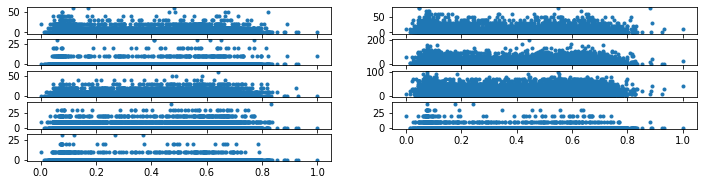

In [145]:
plt.figure(figsize = (12,4))
for i, ind in enumerate(goodcells.index):
    plt.subplot(7,2,i+1)
    plt.plot(contrast_norm,goodcells.at[ind,'rate'],'.')
plt.xlabel('contrast')
plt.ylabel('rate')

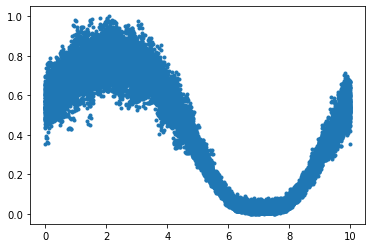

In [596]:
# normalize contrast to go from 0 to ~1
contrast_norm = (contrast_interp - min(contrast_interp))/(max(contrast_interp)- min(contrast_interp))
plt.plot(t[0:-1]%10,contrast_norm,'.')


In [597]:
# calculate contrast - response functions
# mean firing rate in timebins correponding to contrast ranges
resp = np.empty((9,8))
crange = np.arange(0,0.8,0.1)
for i,ind in enumerate(goodcells.index):
    for c,cont in enumerate(crange):
        resp[i,c] = np.mean(goodcells.at[ind,'rate'][(contrast_norm>cont) & (contrast_norm<(cont+0.1))])
plt.plot(np.transpose(resp))
plt.ylim(0,10)
plt.xlabel('contrast')
plt.ylabel('sp/sec')
    

IndexError: boolean index did not match indexed array along dimension 0; dimension is 6650 but corresponding boolean dimension is 26601

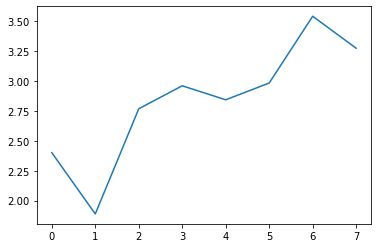

In [533]:
plt.plot(resp[6,:])
plt.xlabel('contrast')
plt.ylabel('sp/sec')

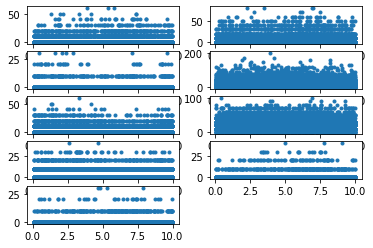

In [475]:
for i,ind in enumerate(goodcells.index):
    plt.subplot(5,2,i+1)
    plt.plot(t[0:-1]%10,goodcells.at[ind,'rate'],'.')
plt.xlabel('time mod 10sec')

# min(contrast_interp)

In [598]:
# create interpolator for movie data so we can evaluate at same timebins are firing rate
movInterp = interp1d(world_t,img_norm,axis=0)

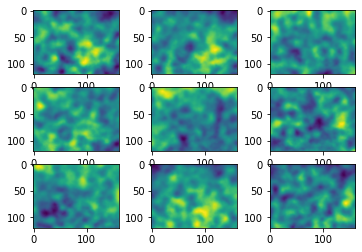

In [614]:
# calculate spike-triggered average
sta = 0
lag = 1
for c, ind in enumerate(goodcells.index):
    r = goodcells.at[ind,'rate']
    for i in range(5,t.size-10):
        sta = sta+r[i+lag]*movInterp(t[i])
    plt.subplot(3,3,c+1)
    sta = sta/np.sum(r)
    plt.imshow(sta)